Shape of Data: (150, 4)
Shape of transformed Data: (150, 2)


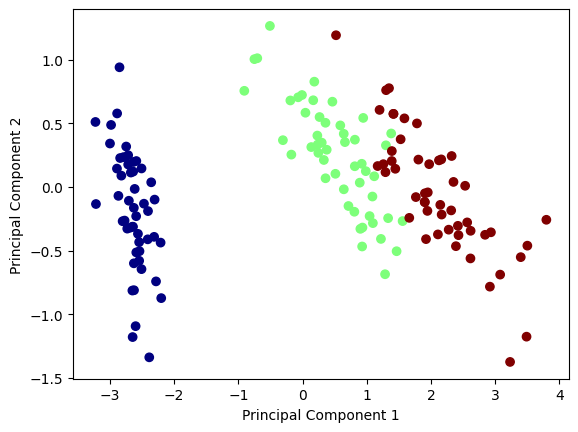

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

class PCA:

  def __init__(self, n_components):
    self.n_components = n_components
    self.components = None
    self.mean = None

  def fit(self, X):
    # Mean center the data
    self.mean = np.mean(X, axis=0)
    X = X - self.mean

    #Calculate covariance matrix
    cov = np.cov(X.T)

    #Calculate eigenvalues and eigen vectors
    eigenvalues, eigenvectors, = np.linalg.eig(cov)

    # Sort the vectors in decreasing order of eigenvalues
    eigenvectors = eigenvectors.T
    idxs = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idxs]
    eigenvectors = eigenvectors[idxs]

    # Take required number of components
    self.components = eigenvectors[:self.n_components]


  def transform(self, X):
    X = X - self.mean
    return np.dot(X, self.components.T)


X = load_iris().data
y = load_iris().target

pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

print("Shape of Data:", X.shape)
print("Shape of transformed Data:", X_projected.shape)

pc1 = X_projected[:, 0]
pc2 = X_projected[:, 1]

plt.scatter(pc1, pc2, c=y, cmap="jet")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.show()